# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from scipy.stats import stats

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy



In [2]:
# NUM_POINTS = 50   # DEBUG 1500
BASE_URL = f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}"



In [3]:
BASE_URL

'http://api.openweathermap.org/data/2.5/weather?appid=f4a34984882705ef6c4e28ef993c3fc1'

### Generate the Cities List by Using the `citipy` Library

In [4]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations

lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 591


In [ ]:
cities

In [5]:
cities[0]

'port-aux-francais'

In [6]:


for city in cities:

    city_url = f"{BASE_URL}&q={city.replace(' ', '+')}"
    response = requests.get(city_url)
    city_data = response.json()
    print(city_data)

{'coord': {'lon': 70.2167, 'lat': -49.35}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 281.02, 'feels_like': 275.32, 'temp_min': 281.02, 'temp_max': 281.02, 'pressure': 1005, 'humidity': 93, 'sea_level': 1005, 'grnd_level': 1003}, 'visibility': 10000, 'wind': {'speed': 16.53, 'deg': 298, 'gust': 24.44}, 'clouds': {'all': 100}, 'dt': 1706380401, 'sys': {'country': 'TF', 'sunrise': 1706313186, 'sunset': 1706368203}, 'timezone': 18000, 'id': 1546102, 'name': 'Port-aux-Français', 'cod': 200}
{'coord': {'lon': -76.2167, 'lat': -13.7}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 299.18, 'feels_like': 299.18, 'temp_min': 298.72, 'temp_max': 299.18, 'pressure': 1011, 'humidity': 78}, 'visibility': 10000, 'wind': {'speed': 5.14, 'deg': 300}, 'clouds': {'all': 0}, 'dt': 1706380401, 'sys': {'type': 1, 'id': 8691, 'country': 'PE', 'sun

In [7]:
city_data['coord']['lat']

-41.606

In [8]:
type(response.json())

dict

In [9]:
response.json()

{'coord': {'lon': -65.3557, 'lat': -41.606},
 'weather': [{'id': 800,
   'main': 'Clear',
   'description': 'clear sky',
   'icon': '01d'}],
 'base': 'stations',
 'main': {'temp': 301.61,
  'feels_like': 300.41,
  'temp_min': 301.61,
  'temp_max': 301.61,
  'pressure': 1011,
  'humidity': 26,
  'sea_level': 1011,
  'grnd_level': 984},
 'visibility': 10000,
 'wind': {'speed': 10.67, 'deg': 68, 'gust': 8.95},
 'clouds': {'all': 1},
 'dt': 1706380497,
 'sys': {'country': 'AR', 'sunrise': 1706347180, 'sunset': 1706399294},
 'timezone': -10800,
 'id': 3835297,
 'name': 'Sierra Grande',
 'cod': 200}

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [10]:
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0
        # print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))
        

    # Create endpoint URL with each city
    city_url =  f"{BASE_URL}&q={city.replace(' ', '+')}"
    response = requests.get(city_url)
    
    
    # Log the url, record, and set numbers
    print(f"Processing Record {record_count} of Set {set_count} | {city}")

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date,
        })

    # If an error is experienced, skip the city
    except KeyError:
        print(f"City {city} not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port-aux-francais
Processing Record 2 of Set 1 | pisco
Processing Record 3 of Set 1 | novodvinsk
Processing Record 4 of Set 1 | waitangi
Processing Record 5 of Set 1 | college
Processing Record 6 of Set 1 | nizhneangarsk
Processing Record 7 of Set 1 | mersa matruh
Processing Record 8 of Set 1 | hamilton
Processing Record 9 of Set 1 | bredasdorp
Processing Record 10 of Set 1 | vorgashor
Processing Record 11 of Set 1 | invercargill
Processing Record 12 of Set 1 | longyearbyen
Processing Record 13 of Set 1 | bagan
Processing Record 14 of Set 1 | jamestown
Processing Record 15 of Set 1 | la rinconada
Processing Record 16 of Set 1 | airuk
Processing Record 17 of Set 1 | nova sintra
Processing Record 18 of Set 1 | petropavlovsk-kamchatsky
Processing Record 19 of Set 1 | sao vicente
Processing Record 20 of Set 1 | hermanus
Processing Record 21 of Set 1 | whitehorse
Processing Record 22 of Set 1 | remire

ConnectionError: ('Connection aborted.', RemoteDisconnected('Remote end closed connection without response'))

In [11]:
len(city_data)

525

In [12]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port-aux-francais,-49.3500,70.2167,281.02,93,100,16.53,TF,1706380401
1,pisco,-13.7000,-76.2167,299.18,78,0,5.14,PE,1706380401
2,novodvinsk,64.4165,40.8122,269.01,91,100,3.95,RU,1706380402
3,waitangi,-43.9535,-176.5597,291.94,93,23,1.79,NZ,1706380402
4,college,64.8569,-147.8028,234.12,59,75,2.06,US,1706380306


In [13]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port-aux-francais,-49.3500,70.2167,281.02,93,100,16.53,TF,1706380401
1,pisco,-13.7000,-76.2167,299.18,78,0,5.14,PE,1706380401
2,novodvinsk,64.4165,40.8122,269.01,91,100,3.95,RU,1706380402
3,waitangi,-43.9535,-176.5597,291.94,93,23,1.79,NZ,1706380402
4,college,64.8569,-147.8028,234.12,59,75,2.06,US,1706380306


In [14]:
# Output File (CSV)
output_data = "output_data/cities.csv"

In [15]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data", index_label="City_ID")

In [16]:
# Read saved data
city_data_df = pd.read_csv("output_data", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,281.02,93,100,16.53,TF,1706380401
1,pisco,-13.7000,-76.2167,299.18,78,0,5.14,PE,1706380401
2,novodvinsk,64.4165,40.8122,269.01,91,100,3.95,RU,1706380402
3,waitangi,-43.9535,-176.5597,291.94,93,23,1.79,NZ,1706380402
4,college,64.8569,-147.8028,234.12,59,75,2.06,US,1706380306


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

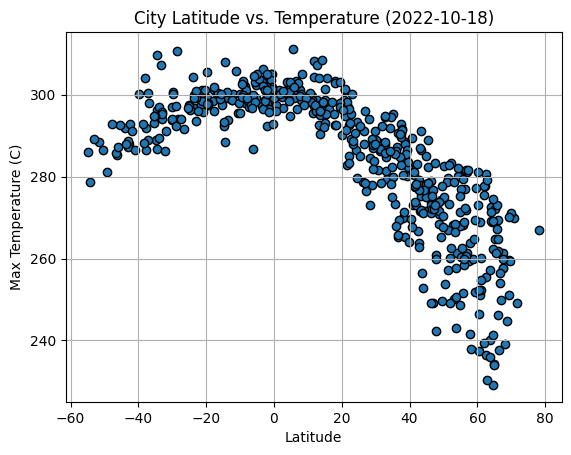

In [17]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], edgecolors='black', linewidths=1, marker='o',  label='Cities')


# Incorporate the other graph properties
plt.title('City Latitude vs. Temperature (2022-10-18)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.grid(True)

# Save the figure
# plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

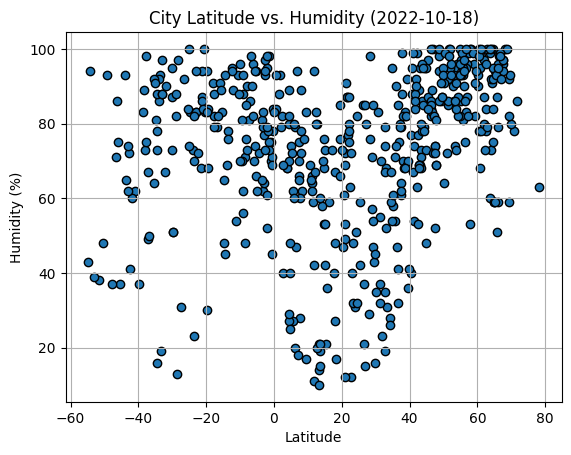

In [18]:
# Build the scatter plots for latitude vs. humidity

plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], edgecolors='black', linewidths=1, marker='o',  label='Cities')

# Incorporate the other graph properties
# YOUR CODE HERE
plt.title('City Latitude vs. Humidity (2022-10-18)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(True)
# Save the figure
# plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

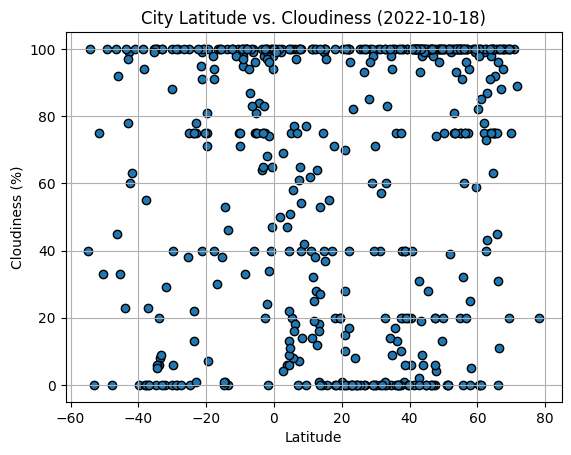

In [19]:
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], edgecolors='black', linewidths=1, marker='o',  label='Cities')


# Incorporate the other graph properties
plt.title('City Latitude vs. Cloudiness (2022-10-18)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(True)

# Save the figure
# plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

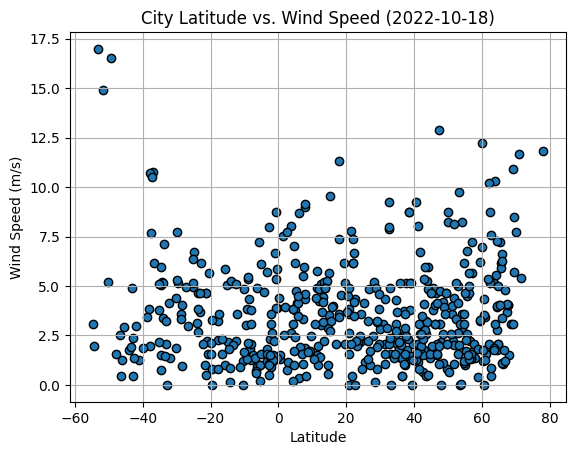

In [21]:
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], edgecolors='black', linewidths=1, marker='o',  label='Cities')


# Incorporate the other graph properties
plt.title('City Latitude vs. Wind Speed (2022-10-18)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.grid(True)

# Save the figure
# plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [ ]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE
# def linear_regression_plot(x_values, y_values):
# (slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
# Get regression values
# regress_values = x_values * slope + intercept
# print(regress_values)

In [22]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,novodvinsk,64.4165,40.8122,269.01,91,100,3.95,RU,1706380402
4,college,64.8569,-147.8028,234.12,59,75,2.06,US,1706380306
5,nizhneangarsk,55.7833,109.5500,251.48,81,0,4.47,RU,1706380402
6,mersa matruh,31.3525,27.2453,288.26,55,40,2.06,EG,1706380402
7,hamilton,39.1834,-84.5333,280.12,92,100,5.14,US,1706380316


In [23]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)

southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,281.02,93,100,16.53,TF,1706380401
1,pisco,-13.7000,-76.2167,299.18,78,0,5.14,PE,1706380401
3,waitangi,-43.9535,-176.5597,291.94,93,23,1.79,NZ,1706380402
8,bredasdorp,-34.5322,20.0403,294.38,78,100,5.04,ZA,1706380403
10,invercargill,-46.4000,168.3500,285.38,86,45,0.45,NZ,1706380303


###  Temperature vs. Latitude Linear Regression Plot

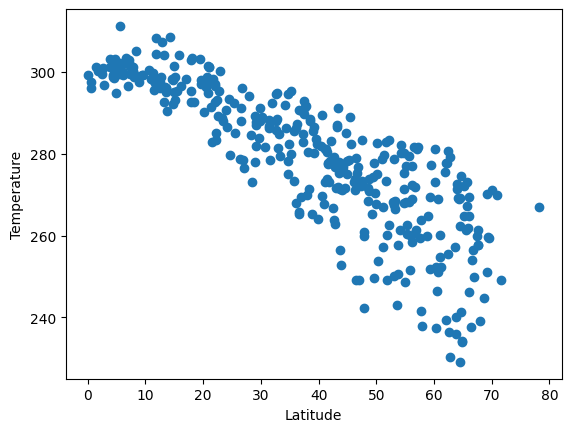

In [24]:
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.show()

In [25]:
# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
print(regress_values)

City_ID
2      259.437425
4      259.111015
5      265.836070
6      283.943378
7      278.139371
          ...    
515    300.612599
516    276.892283
521    296.248607
523    279.691598
524    257.669815
Name: Lat, Length: 368, dtype: float64


/var/folders/x4/l7tc61hd00n1s8vbqfwjq7k40000gn/T/ipykernel_97067/351952290.py:2: DeprecationWarning: Please use `linregress` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  (slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)


In [26]:
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = -0.74x +307.18


The r-value is: 0.7079520257561931


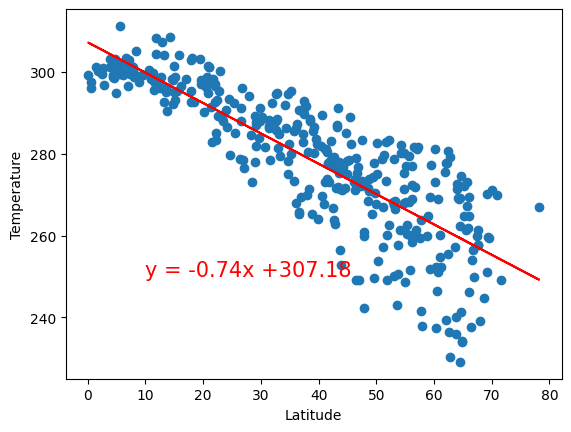

In [27]:
# Linear regression on Northern Hemisphere
# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.annotate(line_eq,(10,250),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

ValueError: x and y must have same first dimension, but have shapes (157,) and (368,)

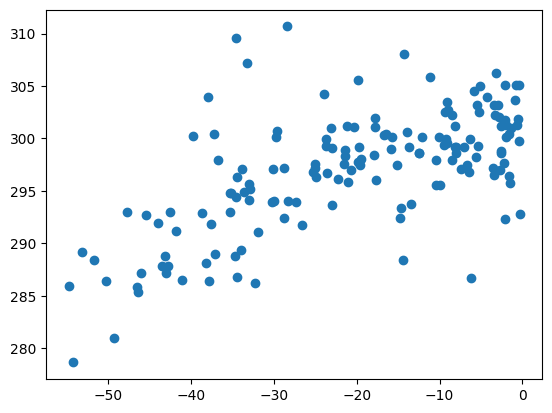

In [28]:
# Linear regression on Southern Hemisphere

# Create Plot
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.annotate(line_eq,(-50,305),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

As could be predicted, the overall temperature increases as the latitude nears 0 (Equator)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.7079520257561931


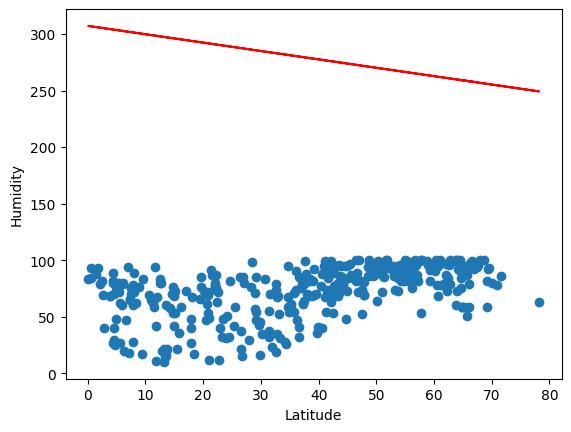

In [29]:

x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.annotate(line_eq,(-50,310),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

ValueError: x and y must have same first dimension, but have shapes (157,) and (368,)

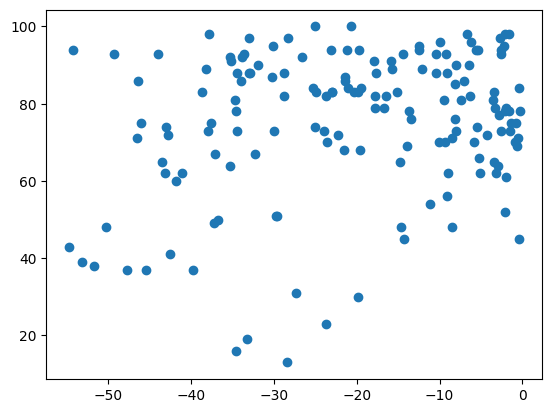

In [30]:
#Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.annotate(line_eq,(-50,200),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

The Humidity level increases the closer as the latitude nears "0"

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.7079520257561931


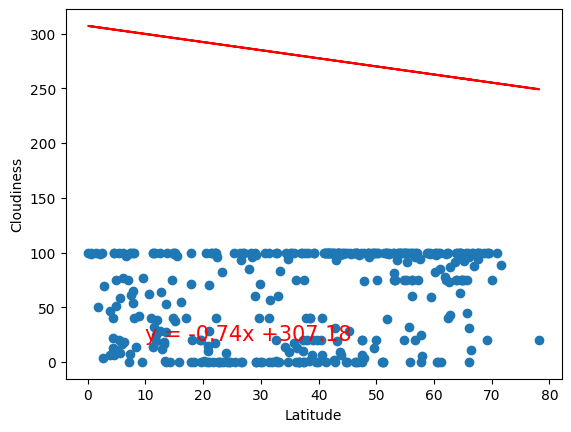

In [31]:
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.annotate(line_eq,(10,20),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

The r-value is: 0.7079520257561931


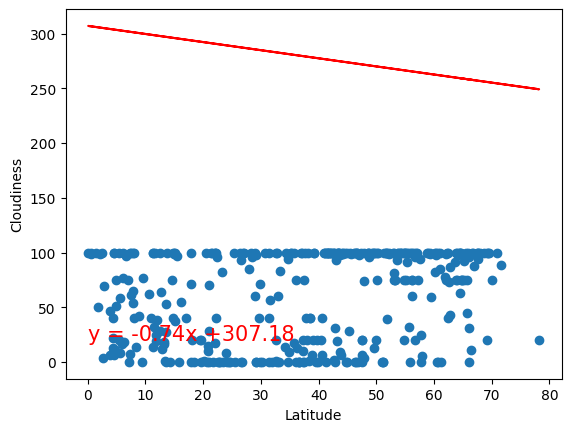

In [32]:
# Northern Hemisphere

x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.annotate(line_eq,(0,20),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

In [ ]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.annotate(line_eq,(0,20),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

Cloudiness seems to be unrelated to the Latitude. Further research required

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.7079520257561931


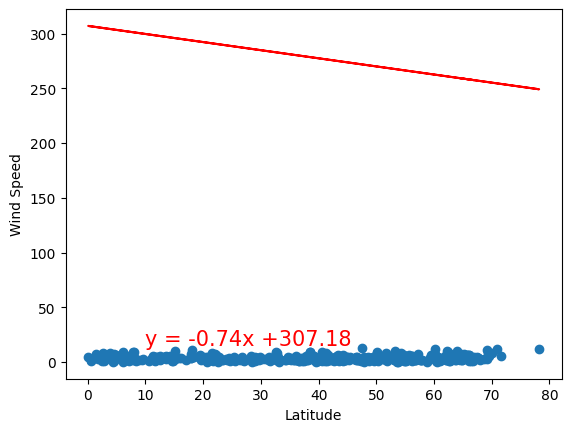

In [33]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.annotate(line_eq,(10,15),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

In [34]:
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = -0.74x +307.18


ValueError: x and y must have same first dimension, but have shapes (157,) and (368,)

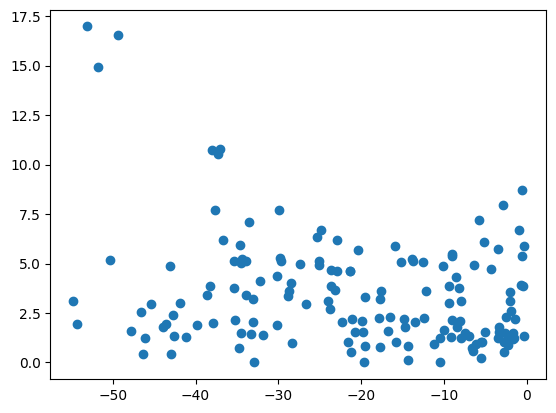

In [35]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.annotate(line_eq,(10,15),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

The Wind Speed appears to increase the further away from center.